In [2]:
import pandas as pd
import re
import seaborn as sns
from plot_learning_curves import plot_learning_curves, parse_training_log

In [3]:
# Unified function to load data from array format files
def load_data_file(filename):
    """Load data from files containing arrays in the format: [value1, value2, ...]"""
    data = []
    try:
        with open(filename, 'r') as f:
            content = f.read().strip()
            # Remove brackets and split by comma
            if content.startswith('[') and content.endswith(']'):
                content = content[1:-1]  # Remove brackets
            
            # Split by comma and extract numbers
            for item in content.split(','):
                item = item.strip()
                if item:
                    # Try different patterns to extract numbers
                    # Pattern 1: array([number])
                    match = re.search(r'array\(\[(\d+)\]\)', item)
                    if match:
                        data.append(int(match.group(1)))
                        continue
                    
                    # Pattern 2: np.int64(number)
                    match = re.search(r'np\.int64\((\d+)\)', item)
                    if match:
                        data.append(int(match.group(1)))
                        continue
                    
                    # Pattern 3: just a number
                    match = re.search(r'(\d+)', item)
                    if match:
                        data.append(int(match.group(1)))
                        
    except FileNotFoundError:
        print(f"{filename} not found. Returning empty list.")
    except Exception as e:
        print(f"Error reading {filename}: {e}")
    
    return data

# Load all data files
random_data = load_data_file('random.txt')
most_data = load_data_file('most.txt')
least_data = load_data_file('least.txt')
true_data = load_data_file('true.txt')
most_data_no_noise = load_data_file('most2.txt')

# Create DataFrames
df_random = pd.DataFrame(random_data, columns=['random'])
df_most = pd.DataFrame(most_data, columns=['most'])
df_least = pd.DataFrame(least_data, columns=['least'])
df_true = pd.DataFrame(true_data, columns=['true'])
df_most_no_noise = pd.DataFrame(most_data_no_noise, columns=['most_no_noise'])

# Print summary
print(f"Loaded data:")
print(f"  random.txt: {len(random_data)} values")
print(f"  most.txt: {len(most_data)} values")
print(f"  least.txt: {len(least_data)} values")
print(f"  true.txt: {len(true_data)} values")
print(f"  most2.txt: {len(most_data_no_noise)} values")


Loaded data:
  random.txt: 50000 values
  most.txt: 50000 values
  least.txt: 50000 values
  true.txt: 50000 values
  most2.txt: 50000 values


In [3]:
# Display most data summary
print(f"Most data shape: {df_most.shape}")
print(f"Unique values in most: {sorted(df_most['most'].unique())}")
df_most.head()

Most data shape: (50000, 1)
Unique values in most: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]


,most
0,8
1,2
2,8
3,8
4,4


In [4]:
# Display least data summary
print(f"Least data shape: {df_least.shape}")
print(f"Unique values in least: {sorted(df_least['least'].unique())}")
df_least.head()

Least data shape: (50000, 1)
Unique values in least: [np.int64(0), np.int64(1), np.int64(2), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]


,least
0,5
1,6
2,6
3,6
4,6


In [5]:
# Display true data summary
print(f"True data shape: {df_true.shape}")
print(f"Unique values in true: {sorted(df_true['true'].unique())}")
df_true.head()

True data shape: (50000, 1)
Unique values in true: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)]


,true
0,0
1,0
2,0
3,0
4,0


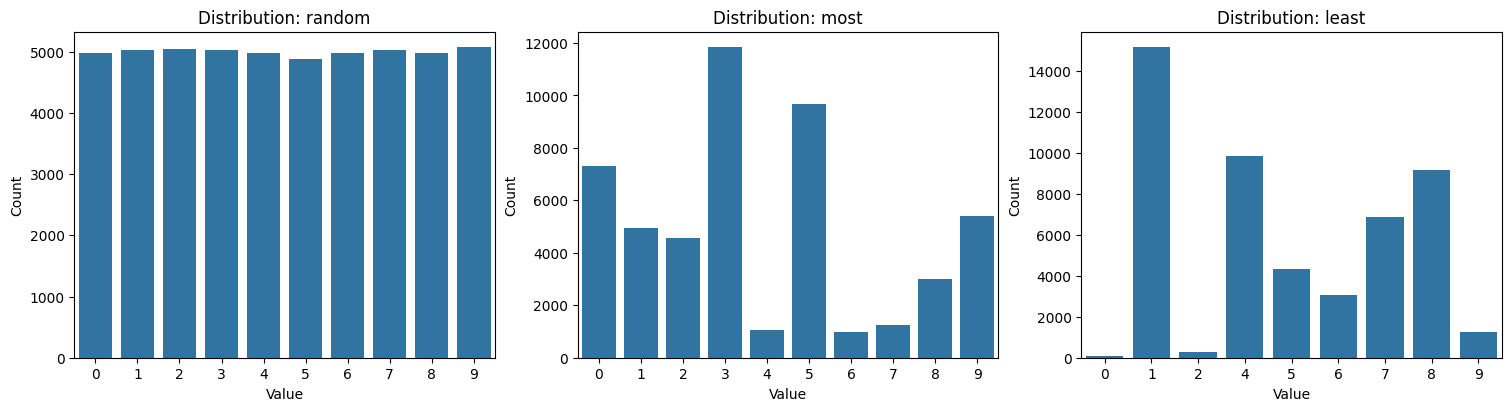

In [4]:
# concatenate the three dataframes side-by-side
df_combined = pd.concat([df_random, df_most, df_least, df_most_no_noise, df_true], axis=1)

# get counts of unique values for each column
counts = {col: df_combined[col].value_counts().sort_index() for col in df_combined.columns}

# plot the counts for each column
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4), constrained_layout=True)
for ax, col in zip(axes, df_combined.columns):
    ct = counts[col]
    sns.barplot(x=ct.index.astype(str), y=ct.values, ax=ax)
    ax.set_title(f"Distribution: {col}")
    ax.set_xlabel("Value")
    ax.set_ylabel("Count")
plt.show()

In [5]:
# Create combined dataframe with all columns for analysis
df_combined = pd.concat([df_random, df_most, df_least,df_most_no_noise, df_true], axis=1)

print(f"Combined dataframe shape: {df_combined.shape}")
print(f"Columns: {list(df_combined.columns)}")
print(f"Data length check:")
for col in df_combined.columns:
    print(f"  {col}: {len(df_combined[col].dropna())} non-null values")

df_combined.head()

Combined dataframe shape: (50000, 5)
Columns: ['random', 'most', 'least', 'most_no_noise', 'true']
Data length check:
  random: 50000 non-null values
  most: 50000 non-null values
  least: 50000 non-null values
  most_no_noise: 50000 non-null values
  true: 50000 non-null values


,random,most,least,most_no_noise,true
0,6,8,5,8,0
1,7,2,6,2,0
2,1,8,6,8,0
3,8,8,6,8,0
4,3,4,6,4,0



TRANSITION MATRIX: RANDOM vs TRUE

Counts (true vs random):
random     0     1     2     3     4     5     6     7     8     9    All
true                                                                     
0          0   584   552   556   546   584   520   582   534   542   5000
1        594     0   554   563   542   519   595   525   587   521   5000
2        566   580     0   548   553   558   548   551   519   577   5000
3        559   589   571     0   532   538   530   549   554   578   5000
4        554   543   551   548     0   559   540   589   551   565   5000
5        524   538   592   568   564     0   553   539   565   557   5000
6        546   545   583   550   554   580     0   549   538   555   5000
7        589   506   529   573   545   511   580     0   575   592   5000
8        520   548   561   552   607   537   516   573     0   586   5000
9        530   599   557   564   539   486   595   570   560     0   5000
All     4982  5032  5050  5022  4982  4872  4977  5

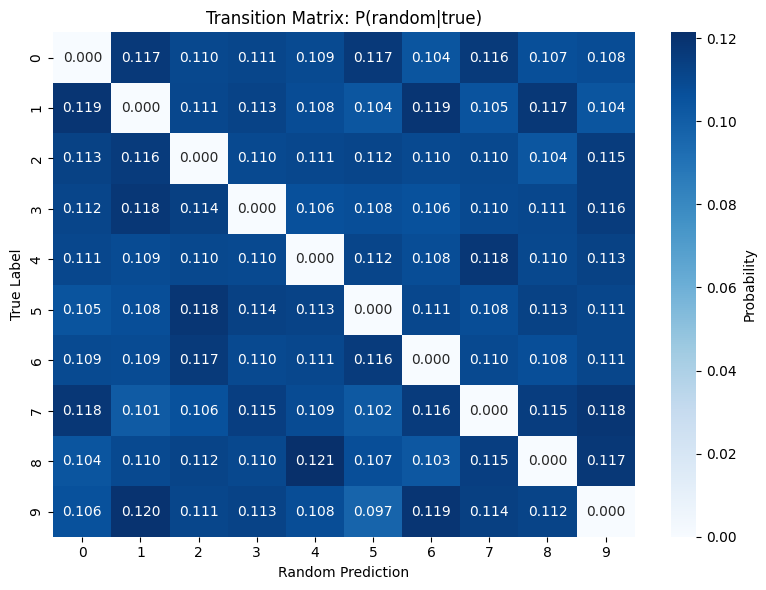


TRANSITION MATRIX: MOST vs TRUE

Counts (true vs most):
most     0     1     2      3     4     5    6     7     8     9    All
true                                                                   
0        6    57  1768    171    70    22   33    34  2656   183   5000
1       42     1    12     37     3     9   13     2    63  4818   5000
2     2317    13    11   1152   411   398  518   113    44    23   5000
3       72    12   180     28    56  4394  121    64    39    34   5000
4      143     6  1498   1646    29   564  223   837    37    17   5000
5       16     5   133   4565    31    60   33   135    17     5   5000
6       56    28   775   3947    50    72    8    11    35    18   5000
7       70    10   124    185   409  4115   20     9    11    47   5000
8     4447   153    48     59     9    18   17    10     6   233   5000
9      124  4653    24     47     4     9    6    25    90    18   5000
All   7293  4938  4573  11837  1072  9661  992  1240  2998  5396  50000

Row-no

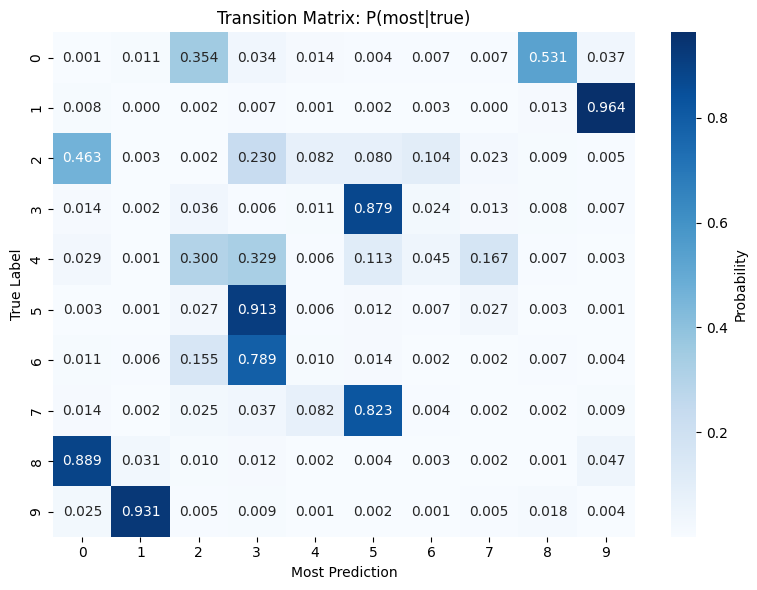


TRANSITION MATRIX: LEAST vs TRUE

Counts (true vs least):
least   0      1    2     4     5     6     7     8     9  3    All
true                                                               
0       0    242    0     2  2350  2354    51     1     0  0   5000
1       0      0   63  4334     1    10   592     0     0  0   5000
2       0   4570    0     0     0     0    16   226   188  0   5000
3      10   4150    0     1     0     0    16   665   158  0   5000
4       0   4572    0     0     2    11     0   135   280  0   5000
5      32    325    0     0     0     8     0  4039   596  0   5000
6      52    412    0     0     0     0  4192   338     6  0   5000
7       1    867    0     0     0   357     0  3769     6  0   5000
8       0      1    0  1181  1741    92  1984     0     1  0   5000
9       0      1  220  4305   238   221    14     1     0  0   5000
All    95  15140  283  9823  4332  3053  6865  9174  1235  0  50000

Row-normalized proportions P(least|true):
least      0  

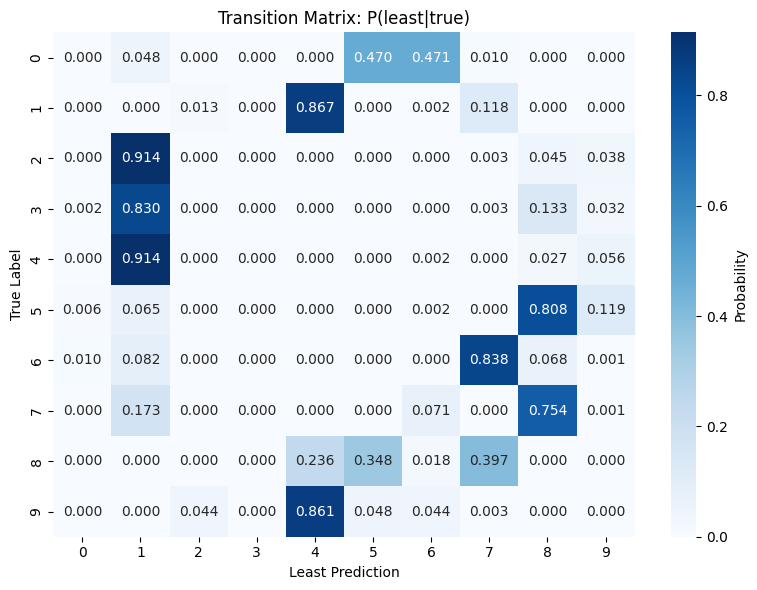


TRANSITION MATRIX: MOST_NO_NOISE vs TRUE

Counts (true vs most_no_noise):
most_no_noise     0     1     2      3     4     5     6     7     8     9  \
true                                                                         
0                 0    57  1771    172    71    22    33    34  2657   183   
1                42     0    12     37     3     9    13     2    63  4819   
2              2319    13     0   1154   411   400   521   114    45    23   
3                74    13   188      0    56  4402   128    64    39    36   
4               144     6  1501   1659     0   567   228   841    37    17   
5                18     6   141   4607    31     0    35   140    17     5   
6                58    28   776   3951    50    73     0    11    35    18   
7                71    10   125    189   409  4119    19     0    11    47   
8              4452   154    48     60     9    17    17    10     0   233   
9               127  4665    26     46     4    10     6    25    9

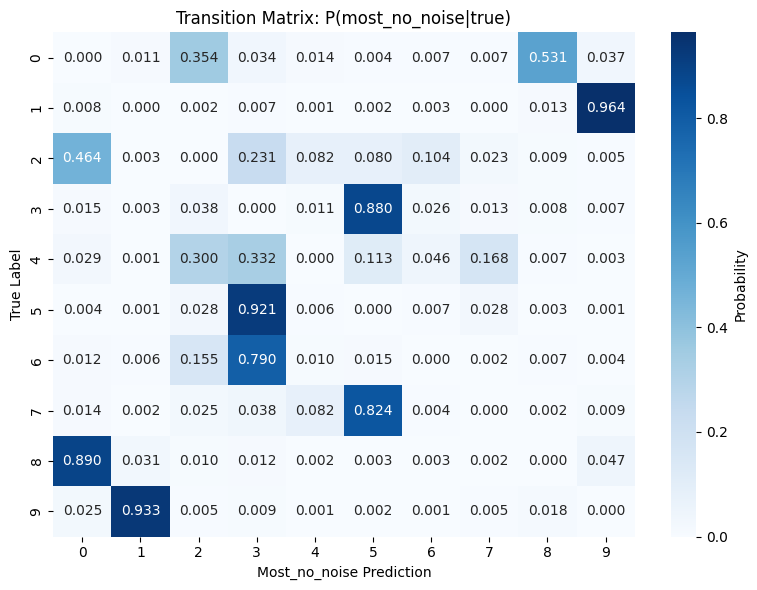

In [6]:
# Compute transition matrices of each column vs 'true'
pred_cols = [c for c in df_combined.columns if c != 'true']
transition_counts = {}
transition_props = {}

for col in pred_cols:
    print(f"\n{'='*50}")
    print(f"TRANSITION MATRIX: {col.upper()} vs TRUE")
    print(f"{'='*50}")
    
    # Crosstab: rows = true labels, cols = predicted labels
    ct = pd.crosstab(df_combined['true'], df_combined[col], margins=True)
    
    # Row-normalized proportions P(predicted | true) - rows sum to 1
    ct_no_margins = pd.crosstab(df_combined['true'], df_combined[col])
    
    # Hard-code value 3 for the 'least' column specifically
    if col == 'least':
        # Get all unique values from true column and prediction column
        true_values = sorted(df_combined['true'].unique())
        pred_values = sorted(df_combined[col].unique())
        
        # Force add value 3 to prediction values if not present
        if 3 not in pred_values:
            pred_values.append(3)
            pred_values = sorted(pred_values)
        
        # Reindex to include value 3 with zeros
        ct_no_margins = ct_no_margins.reindex(index=true_values, columns=pred_values, fill_value=0)
        
        # Also update the marginal crosstab to include value 3
        current_cols = list(ct.columns)
        if 3 not in current_cols[:-1]:  # Exclude 'All' column
            new_cols = sorted([c for c in current_cols if c != 'All']) + [3] + ['All']
            ct = ct.reindex(columns=new_cols, fill_value=0)
            # Recalculate 'All' column after adding the zero column for value 3
            ct['All'] = ct.drop('All', axis=1).sum(axis=1)
    
    transition_counts[col] = ct
    
    print(f"\nCounts (true vs {col}):")
    print(ct)
    
    # Check if we have data to work with
    if ct_no_margins.empty or ct_no_margins.shape[0] == 0 or ct_no_margins.shape[1] == 0:
        print(f"\nNo data available for transition matrix between 'true' and '{col}'")
        transition_props[col] = pd.DataFrame()
        continue
    
    transition_props[col] = ct_no_margins.div(ct_no_margins.sum(axis=1), axis=0).fillna(0)
    
    print(f"\nRow-normalized proportions P({col}|true):")
    print(transition_props[col].round(3))
    
    # Only create heatmap if we have data
    if not transition_props[col].empty and transition_props[col].size > 0:
        # Heatmap of proportions
        plt.figure(figsize=(8, 6))
        sns.heatmap(transition_props[col], annot=True, fmt='.3f', cmap='Blues', 
                    cbar_kws={'label': 'Probability'})
        plt.title(f'Transition Matrix: P({col}|true)')
        plt.ylabel('True Label')
        plt.xlabel(f'{col.capitalize()} Prediction')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Skipping heatmap for '{col}' - no valid data to plot")

In [3]:
with open('wandb/run-20250821_001335-wapjvhza/files/output.log') as f:
    log_data = f.read()

metrics = parse_training_log(log_data)

plot_learning_curves(metrics, output_filename="most_no_noise.png")   

Plot successfully saved to: output/most_no_noise.png
